In [5]:
# import as needed
import mesa_reader as mr
import matplotlib.pylab as plt
import numpy as np
import os
import math
from math import log
from scipy.integrate import cumtrapz

G = 6.67408e-11 # gravitational constant
# change G to cgs units
G = G * 1e3

In [3]:
# find and import the profile closest to your target profile

# user-defined - see analyzeHistoryDataFinal to determine
modelNumber = 5850

# find all profile.index files
filenames = []

workingDirectory = '/Users/emilyflynn/Desktop/1.0M_Sun/LOGS'
#workingDirectory = '/Users/emilyflynn/Desktop/25M_tests/70M_logs/'

for root, dirs, files in os.walk(workingDirectory):
    for file in files:
        if file.endswith("profiles.index"):
            filenames.append(os.path.join(root, file))

profiles = []
# import files
for file in filenames:
    i = mr.MesaProfileIndex(file)
    profiles.append(i)

# find the closest model number - ugly but functional
closest = 0
diff = 1e10
profilePath = ''
j = 0
for index in profiles:
    values = index.model_numbers
    profileNums = index.profile_numbers
    k=0
    for i in values:
        if (abs(modelNumber - i) < diff):
            diff = abs(modelNumber - i)
            closest = i
            og = filenames[j]
            og = og[:-14] # put together the file name given the directory
            profilePath = og + 'profile' + str(profileNums[k]) + '.data'
        k+=1
    j+=1

print('difference: ' + str(diff))
print('model number: ' + str(closest))
print('file path: ' + str(profilePath))

# import target profile
p = mr.MesaData(profilePath)

difference: 0
model number: 5850
file path: /Users/emilyflynn/Desktop/1.0M_Sun/LOGS/profile121.data


In [ ]:
# plot mass v radius
fig, ax = plt.subplots(figsize=(15,4))
# if radius is not in log
plt.plot(np.log(p.radius), p.mass)
# if radius is in log
#plt.plot(p.logR, p.mass)
plt.xlabel('log Radius (Rsun)')
plt.ylabel('Mass (Msun)')
plt.grid(True)

In [ ]:
# plot density v radius
fig, ax = plt.subplots(figsize=(15,4))
# if radius is not in log
plt.plot(np.log(p.radius), p.logRho)
# if radius is in log
#plt.plot(p.logR, p.logRho)
plt.xlabel('log Radius (Rsun)')
plt.ylabel('log Density')
plt.grid(True)

In [ ]:
# plot convective zones - eq. 2

# get radius
rLogForm = True
if rLogForm:
    r = p.logR
    r = 10**r 
else:
    r = p.radius

r = r*69.551e9   # change units to cm
r = r[100:]      # cut off the first 100 points - takes care of surface weirdness

v = p.log_conv_vel
v = [i if i>1e-8 else 1e-8 for i in v] # if having issues with v being too close to 0
v = np.power(10, v) # un-log it
v = -1/v            # it'll be integrated like this
v = v[100:]         # cut off first 100 points

# integrate
tconv = cumtrapz(y=v, x=r)

# plot
fig, ax = plt.subplots(figsize=(6,4))
plt.loglog(r[:-1], tconv)
plt.xlabel('Radius (cm)')
plt.ylabel('t_conv [s]')
plt.ylim(1e4, 1e12)
plt.xlim(1e9, 1e14)
plt.grid(True)

In [ ]:
# find e_bind, energy needed to strip the envelope's mass to radius r - eq. 4

# get radius
rLogForm = True
if rLogForm:
    r = p.logR
    r = 10**r 
else:
    r = p.radius

r = r*69.551e9   # change units to cm
r = r[100:]      # cut off the first 100 points - takes care of surface weirdness

m = p.mass
m = m*1.989e33   # change units to grams
m = m[100:]      # exclude first 100 points

integrand = []

for i in range(len(m)):
    x = G * m[i] / r[i]
    integrand.append(x)

ebind = cumtrapz(y=integrand, x=m)

# plot
fig, ax = plt.subplots(figsize=(6,4))
plt.loglog(r[:-1], -ebind)
plt.xlabel('Radius (cm)')
plt.ylabel('e_bind [erg]')
plt.xlim(1e9, 1e13)
plt.ylim(1e44, 1e50)
plt.grid(True)

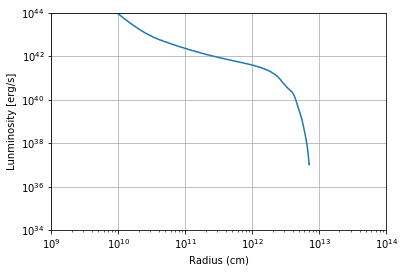

In [11]:
# the maximum luminosity carried by convection - eq. 7

fig, ax = plt.subplots(figsize=(6,4))
plt.xlabel('Radius (cm)')
plt.ylabel('Lunminosity [erg/s]')
plt.xlim(1e9, 1e14)
plt.ylim(1e34, 1e44)
plt.grid(True)

# need: beta ~ 5, 4pi, density[r], radius, sound speed c[r]
# define a constant, k
k = 5 * 4 * math.pi

# get density
rho = p.logRho
rho = 10**rho
rho = rho[100:]

# get radius
rLogForm = True
if rLogForm:
    r = p.logR
    r = 10**r 
else:
    r = p.radius

r = r*69.551e9   # change units to cm
r = r[100:]      # cut off the first 100 points - takes care of surface weirdness

# get sound speed
c = p.csound
c = c[100:]

lumMax = k * r**2 * rho * c**3
plt.loglog(r, lumMax)